In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/samplems.csv
/kaggle/input/trainms.csv
/kaggle/input/testms.csv


In [2]:
!pip install seaborn

In [3]:
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train_data=pd.read_csv('/kaggle/input/trainms.csv')
train_data.head(20)

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,6,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,7,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,8,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,9,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,10,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
s.no                         1000 non-null int64
Timestamp                    1000 non-null object
Age                          1000 non-null int64
Gender                       1000 non-null object
Country                      1000 non-null object
state                        600 non-null object
self_employed                982 non-null object
family_history               1000 non-null object
treatment                    1000 non-null object
work_interfere               774 non-null object
no_employees                 1000 non-null object
remote_work                  1000 non-null object
tech_company                 1000 non-null object
benefits                     1000 non-null object
care_options                 1000 non-null object
wellness_program             1000 non-null object
seek_help                    1000 non-null object
anonymity                    1000 non-null object

In [7]:
train_data.isnull()

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [9]:
train_data["self_employed"].fillna("No",inplace=True)
train_data.isnull()

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


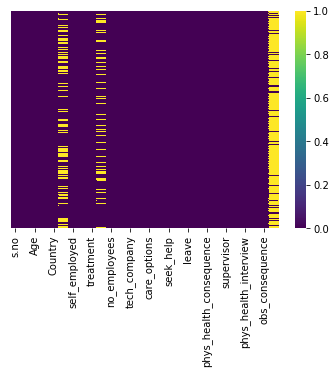

In [10]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap="viridis")

In [12]:
state=pd.get_dummies(train_data["state"],drop_first=True)
state.head()

,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
workinter=pd.get_dummies(train_data["work_interfere"],drop_first=True)
workinter.head()

,Often,Rarely,Sometimes
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,0


In [15]:
train_data = pd.concat([train_data,state,workinter],axis=1)
train_data.head()

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,UT,VA,VT,WA,WI,WV,WY,Often,Rarely,Sometimes
0,1,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,...,0,0,0,0,0,0,0,1,0,0
1,2,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,...,0,0,0,0,0,0,0,0,1,0
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,...,0,0,0,0,0,0,0,0,1,0
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,...,0,0,0,0,0,0,0,1,0,0
4,5,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train_data.drop(['state','work_interfere'],axis=1,inplace=True)
train_data.head()

,s.no,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,...,UT,VA,VT,WA,WI,WV,WY,Often,Rarely,Sometimes
0,1,2014-08-27 11:29:31,37,Female,United States,No,No,Yes,6-25,No,...,0,0,0,0,0,0,0,1,0,0
1,2,2014-08-27 11:29:37,44,M,United States,No,No,No,More than 1000,No,...,0,0,0,0,0,0,0,0,1,0
2,3,2014-08-27 11:29:44,32,Male,Canada,No,No,No,6-25,No,...,0,0,0,0,0,0,0,0,1,0
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,No,Yes,Yes,26-100,No,...,0,0,0,0,0,0,0,1,0,0
4,5,2014-08-27 11:30:22,31,Male,United States,No,No,No,100-500,Yes,...,0,0,0,0,0,0,0,0,0,0


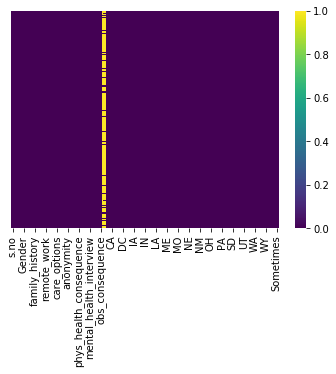

In [19]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap="viridis")

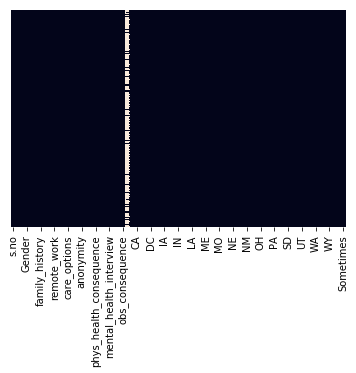

In [24]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [28]:
print(sum(train_data.isnull().sum()))

873


In [33]:
train_data.loc[:, train_data.isna().any()]

""
0
1
2
3
4
5
6
7
8
9


In [31]:
train_data.drop(['comments'],axis=1,inplace=True)
train_data.head()

,s.no,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,...,UT,VA,VT,WA,WI,WV,WY,Often,Rarely,Sometimes
0,1,2014-08-27 11:29:31,37,Female,United States,No,No,Yes,6-25,No,...,0,0,0,0,0,0,0,1,0,0
1,2,2014-08-27 11:29:37,44,M,United States,No,No,No,More than 1000,No,...,0,0,0,0,0,0,0,0,1,0
2,3,2014-08-27 11:29:44,32,Male,Canada,No,No,No,6-25,No,...,0,0,0,0,0,0,0,0,1,0
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,No,Yes,Yes,26-100,No,...,0,0,0,0,0,0,0,1,0,0
4,5,2014-08-27 11:30:22,31,Male,United States,No,No,No,100-500,Yes,...,0,0,0,0,0,0,0,0,0,0


In [34]:
train_data.isnull().sum()

s.no         0
Timestamp    0
Age          0
Gender       0
Country      0
            ..
WV           0
WY           0
Often        0
Rarely       0
Sometimes    0
Length: 72, dtype: int64

In [38]:
Timer=pd.get_dummies(train_data["Timestamp"],drop_first=True)
Timer.head()

,2014-08-27 11:29:37,2014-08-27 11:29:44,2014-08-27 11:29:46,2014-08-27 11:30:22,2014-08-27 11:31:22,2014-08-27 11:31:50,2014-08-27 11:32:05,2014-08-27 11:32:39,2014-08-27 11:32:43,2014-08-27 11:32:44,...,2014-08-29 09:12:16,2014-08-29 09:13:43,2014-08-29 09:14:45,2014-08-29 09:15:05,2014-08-29 09:15:52,2014-08-29 09:19:25,2014-08-29 09:23:22,2014-08-29 09:23:44,2014-08-29 09:24:34,2014-08-29 09:27:12
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
Gender=pd.get_dummies(train_data["Gender"],drop_first=True)
Gender.head()

,Agender,Androgyne,Cis Female,Cis Male,Enby,F,Femake,Female,Female,Female (cis),...,fluid,m,maile,male,male leaning androgynous,msle,non-binary,queer,something kinda male?,woman
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


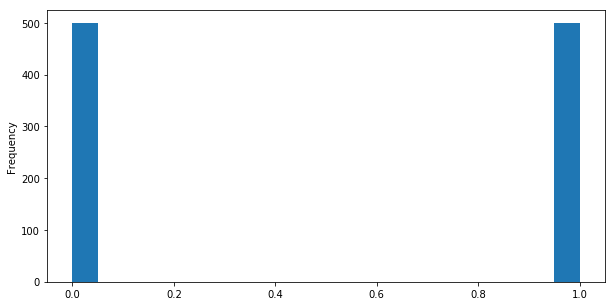

In [40]:
Gender["Male"].plot.hist(bins=20,figsize=(10,5))

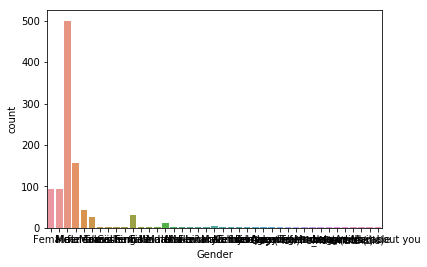

In [41]:
sns.countplot(x="Gender",data=train_data)

In [44]:
country=pd.get_dummies(train_data["Country"],drop_first=True)
country.head()

,Austria,"Bahamas, The",Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Colombia,Costa Rica,Croatia,...,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
se=pd.get_dummies(train_data["self_employed"],drop_first=True)
se.head()

,Yes
0,0
1,0
2,0
3,0
4,0


In [48]:
famhis=pd.get_dummies(train_data["family_history"],drop_first=True)
famhis.head()

,Yes
0,0
1,0
2,0
3,1
4,0


In [49]:
treat=pd.get_dummies(train_data["treatment"],drop_first=True)
treat.head()

,Yes
0,1
1,0
2,0
3,1
4,0


In [50]:
remwork=pd.get_dummies(train_data["remote_work"],drop_first=True)
remwork.head()

,Yes
0,0
1,0
2,0
3,0
4,1


In [52]:
train_data.drop(["self_employed","family_history","remote_work","treatment"],axis=1,inplace=True)
train_data.head()

,s.no,Timestamp,Age,Gender,Country,no_employees,tech_company,benefits,care_options,wellness_program,...,UT,VA,VT,WA,WI,WV,WY,Often,Rarely,Sometimes
0,1,2014-08-27 11:29:31,37,Female,United States,6-25,Yes,Yes,Not sure,No,...,0,0,0,0,0,0,0,1,0,0
1,2,2014-08-27 11:29:37,44,M,United States,More than 1000,No,Don't know,No,Don't know,...,0,0,0,0,0,0,0,0,1,0
2,3,2014-08-27 11:29:44,32,Male,Canada,6-25,Yes,No,No,No,...,0,0,0,0,0,0,0,0,1,0
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,26-100,Yes,No,Yes,No,...,0,0,0,0,0,0,0,1,0,0
4,5,2014-08-27 11:30:22,31,Male,United States,100-500,Yes,Yes,No,Don't know,...,0,0,0,0,0,0,0,0,0,0


In [54]:
train_data = pd.concat([train_data,se,famhis,treat,remwork],axis=1)
train_data.head()

,s.no,Timestamp,Age,Gender,Country,no_employees,tech_company,benefits,care_options,wellness_program,...,WI,WV,WY,Often,Rarely,Sometimes,Yes,Yes,Yes,Yes
0,1,2014-08-27 11:29:31,37,Female,United States,6-25,Yes,Yes,Not sure,No,...,0,0,0,1,0,0,0,0,1,0
1,2,2014-08-27 11:29:37,44,M,United States,More than 1000,No,Don't know,No,Don't know,...,0,0,0,0,1,0,0,0,0,0
2,3,2014-08-27 11:29:44,32,Male,Canada,6-25,Yes,No,No,No,...,0,0,0,0,1,0,0,0,0,0
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,26-100,Yes,No,Yes,No,...,0,0,0,1,0,0,0,1,1,0
4,5,2014-08-27 11:30:22,31,Male,United States,100-500,Yes,Yes,No,Don't know,...,0,0,0,0,0,0,0,0,0,1
